# Linear Regression with Gradient Descent
In this notebook I will go over the basics of linear regression with gradient descent. To start off in linear regression we try to fit a line to best represent some data. The best type of that for this of course is linear data. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and the Issue.
First we will take a look at our data. We can see that its x and y values. We can also graph and see thats its linear data. In the graph below I also have an example of what linear regression with gradient descent attempts to solve which is how can we best represent some linear data. As you can see we have our data is in blue and there are also two lines as well representing models. The red line is very far away and therefor does not represent the data well at all really. However the green line is closer to the data and fits better to it as well making it a better model but not quite the best. With gradient descent we can use machine learning to find the best line/model to represent the data.  

In [24]:
data = pd.read_csv('data.csv')
data

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


In [25]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

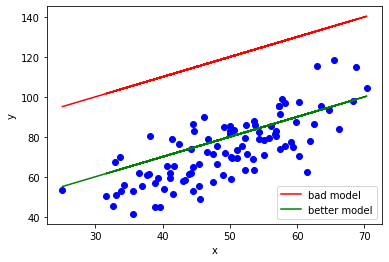

In [26]:
%matplotlib inline 
plt.scatter(X, Y, color='b')
plt.plot(X, (1*X)+70, '-', color='red') # random bad parameters
plt.plot(X, (1*X)+30, '-', color='green') # random better parameters
plt.legend(["bad model", "better model"], loc ="lower right")
plt.xlabel('x')
plt.ylabel('y')
plt.show();

# Preforming Gradient Descent
Now that we know that gradient descent can be used to find a model to best represent some data. We need to know what its actually doing. What gradient descent is doing is its finding the best parameters for m and b. We can of course randomly guess values for those parameters but with gradient desecent we can move to a direction where m and b values give us a small error. This smaller error means that the model is fiting the data better. Gradient descent preforms some math to determine what the best value for each paramter is. To preform gradient descent we will need to understand a little bit of calculus. First we will go over the error function. Here is the the error function $ error = (y'-y) $ where $ y' $ represents the predicted value and $ y $ is the actual value. Now the sum of the squared errors functions is very similar to the error function and looks like this.
## $ sse = \sum_{i=1}^n (y'-y)^2 $
What were doing here is summing all the errors and squaring them. Now we know that $ y' $ is the predicted value and another way to represent the predicted value is by doing $ mx+b $. All together that looks like this 
## $ sse = \sum_{i=1}^n (y'-y)^2 = \sum_{i=1}^n (mx+b - y)^2$
Now this is where the calculus comes in. As I said earlier gradient descent will move us in direction where the values to our parameters will give us a small error. If we take the derrivative of sse function with respect to m and with respect to b his will give us the new values for our parameters. The derrivatives look like this. 
$\frac{d}{dm} = (mx+b - y)^2 = \frac{d}{dm}[(mx+b -y)^2] =  2(mx+b - y)*\frac{d}{dm}[(mx+b-y)] = 2(mx+b -y)*x = 2(y'-y)x$

$\frac{d}{db} = (mx+b - y)^2 =  \frac{d}{db}[(mx+b-y)^2] = 2(mx+b-y)*\frac{d}{db}[(mx+b-y)]=2(mx+b-y)*1=2(y'-y)$

Our new parameters will be given by $ b = 2(y'-y) $ and $ m = 2(y'-y)x $. As I said earlier this will give us parameters that have low error meaning closer to zero. The closer we are to zero the smaller our values will change by. Here is the function performing gradient descent

In [27]:
def gradient_descent(X, y, learning_rate=0.000001, epochs=1000):
    """
    This function will preform gradient descent
    """
    m = 0
    b = 0
    for i in range(epochs):
        y_pred = (m*X) + b
        derivative_m = 2 * sum((y_pred-y)*X)
        derivative_b = 2 * sum(y_pred-y)
        m = m - learning_rate * derivative_m
        b = b - learning_rate * derivative_b
        
    return m,b

In [28]:
m,b = gradient_descent(X, Y)

As you can see our line now looks like it fits are data a lot better. It goes through the data better than the first models in the beggining graph.

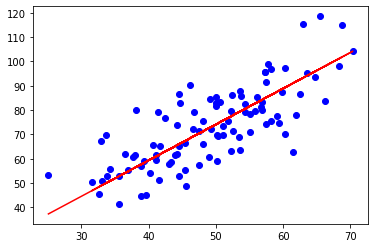

In [29]:
plt.scatter(X, Y, color='b')
plt.plot(X, (m*X)+b, '-', color='red')
plt.show()

# Understanding Gradient Descent Visually